Combine all CSV datas. run only when adding new climate csv datas.

In [12]:
import os
import pandas as pd

# Path to your folder containing the CSV files
folder_path = 'ClimateData'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Loop through each file and append it to the combined DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Save the combined DataFrame to a new CSV file
output_file = 'combined_data.csv'
combined_df.to_csv(output_file, index=False)

print(f"All files have been combined into {output_file}")





All files have been combined into combined_data.csv


Climate Data Analaysis

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Load the data, ensuring that no column is used as the index
file_path = 'combined_data.csv'  # Replace with the correct path to your file
columns = ['LAT', 'LON', 'YEAR', 'DOY', 'Temp', 'Humidity', 'Precipitation']
data = pd.read_csv(file_path, usecols=range(len(columns)), names=columns, skiprows=1)
# data = pd.read_csv(file_path, index_col=None)  # Ensure index_col is set to None
data


,LAT,LON,YEAR,DOY,Temp,Humidity,Precipitation
0,24.75,-124.75,2022,1,17.85,74.01,1.87
1,24.75,-124.25,2022,1,17.90,73.76,1.82
2,24.75,-123.75,2022,1,17.95,72.66,2.11
3,24.75,-123.25,2022,1,17.93,72.66,2.88
4,24.75,-122.75,2022,1,17.77,73.48,4.31
...,...,...,...,...,...,...,...
2116995,44.25,-87.25,2022,365,-0.88,80.89,0.43
2116996,44.25,-86.75,2022,365,0.67,79.41,0.32
2116997,44.25,-86.25,2022,365,0.39,82.81,0.20
2116998,44.25,-85.75,2022,365,-0.74,87.56,0.10


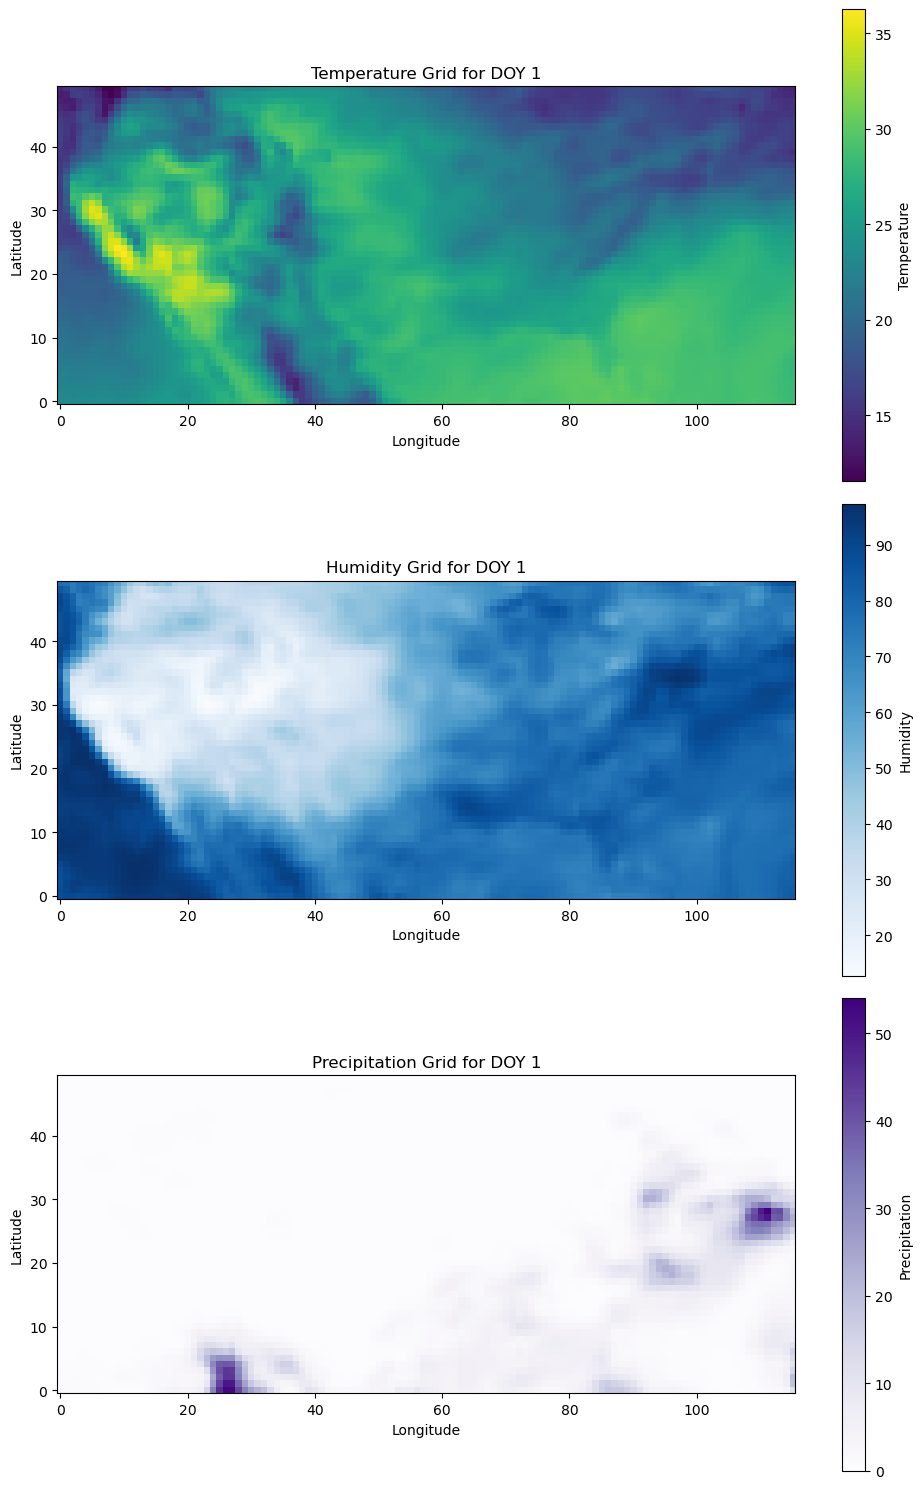

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the correct headers
columns = ['LAT', 'LON', 'YEAR', 'DOY', 'Temp', 'Humidity', 'Precipitation']

# Load the CSV
file_path = 'combined_data.csv'
data = pd.read_csv(file_path, usecols=range(len(columns)), names=columns, skiprows=1)


data_doyX = data[data['DOY'] == 250]
# Pivot the data to create a grid for DOY == X
data_Temp = data_doyX.pivot_table(index='LAT', columns='LON', values='Temp', aggfunc='mean')
data_Humidity = data_doyX.pivot_table(index='LAT', columns='LON', values='Humidity', aggfunc='mean')
data_Precipitation = data_doyX.pivot_table(index='LAT', columns='LON', values='Precipitation', aggfunc='mean')


# Create a figure with three subplots (one for each variable)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot the temperature grid
axes[0].imshow(data_Temp, cmap='viridis', origin='lower')
axes[0].set_title('Temperature Grid for DOY 1')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].figure.colorbar(axes[0].images[0], ax=axes[0], label='Temperature')

# Plot the humidity grid
axes[1].imshow(data_Humidity, cmap='Blues', origin='lower')
axes[1].set_title('Humidity Grid for DOY 1')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].figure.colorbar(axes[1].images[0], ax=axes[1], label='Humidity')

# Plot the precipitation grid
axes[2].imshow(data_Precipitation, cmap='Purples', origin='lower')
axes[2].set_title('Precipitation Grid for DOY 1')
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('Latitude')
axes[2].figure.colorbar(axes[2].images[0], ax=axes[2], label='Precipitation')

plt.tight_layout()
plt.show()


In [74]:
print(data['LAT'].unique().size)
print(data['LON'].unique().size)
# print(data['Suitability'].unique().size)

50
116


In [76]:
data['LAT'].unique()

array([24.75, 25.25, 25.75, 26.25, 26.75, 27.25, 27.75, 28.25, 28.75,
       29.25, 29.75, 30.25, 30.75, 31.25, 31.75, 32.25, 32.75, 33.25,
       33.75, 34.25, 34.75, 35.25, 35.75, 36.25, 36.75, 37.25, 37.75,
       38.25, 38.75, 39.25, 39.75, 40.25, 40.75, 41.25, 41.75, 42.25,
       42.75, 43.25, 43.75, 44.25, 44.75, 45.25, 45.75, 46.25, 46.75,
       47.25, 47.75, 48.25, 48.75, 49.25])

In [77]:
data['LON'].unique()

array([-124.75, -124.25, -123.75, -123.25, -122.75, -122.25, -121.75,
       -121.25, -120.75, -120.25, -119.75, -119.25, -118.75, -118.25,
       -117.75, -117.25, -116.75, -116.25, -115.75, -115.25, -114.75,
       -114.25, -113.75, -113.25, -112.75, -112.25, -111.75, -111.25,
       -110.75, -110.25, -109.75, -109.25, -108.75, -108.25, -107.75,
       -107.25, -106.75, -106.25, -105.75, -105.25,  -84.75,  -84.25,
        -83.75,  -83.25,  -82.75,  -82.25,  -81.75,  -81.25,  -80.75,
        -80.25,  -79.75,  -79.25,  -78.75,  -78.25,  -77.75,  -77.25,
        -76.75,  -76.25,  -75.75,  -75.25,  -74.75,  -74.25,  -73.75,
        -73.25,  -72.75,  -72.25,  -71.75,  -71.25,  -70.75,  -70.25,
        -69.75,  -69.25,  -68.75,  -68.25,  -67.75,  -67.25, -104.75,
       -104.25, -103.75, -103.25, -102.75, -102.25, -101.75, -101.25,
       -100.75, -100.25,  -99.75,  -99.25,  -98.75,  -98.25,  -97.75,
        -97.25,  -96.75,  -96.25,  -95.75,  -95.25,  -94.75,  -94.25,
        -93.75,  -93

Suitability Data Analaysis

In [88]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = "culex_pipiens_meansuitability.nc"
data = nc.Dataset(file_path)
longitude = data.variables['longitude'][:]
latitude = data.variables['latitude'][:]
suitability = data.variables['layer'][:]

# Convert the suitability data to a 2D array if necessary
if len(suitability.shape) > 2:
    suitability = suitability[0, :, :]

# Create a meshgrid for latitude and longitude
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Flatten the grids and suitability array to create a DataFrame
df = pd.DataFrame({
    'Latitude': lat_grid.flatten(),
    'Longitude': lon_grid.flatten(),
    'Suitability': suitability.flatten()
})

df = df[
    (df['Latitude'] >= 24.75) & (df['Latitude'] <= 49.25) &
    (df['Longitude'] >= -124.75) & (df['Longitude'] <= -85.25)
]

print(df)


data_Suitability = df.pivot_table(index='Latitude', columns='Longitude', values='Suitability', aggfunc='mean')

# Plot the suitability
# plt.figure(figsize=(10, 6))
# plt.contourf(longitude, latitude, suitability, cmap="viridis")
# plt.colorbar(label="Habitat Suitability")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.title("Mean Habitat Suitability for Culex pipiens")
# plt.show()


        Latitude   Longitude  Suitability
65060     49.125 -124.666667     0.338010
65061     49.125 -124.416667     0.276758
65062     49.125 -124.166667     0.175402
65063     49.125 -123.916667     0.170936
65064     49.125 -123.666667          NaN
...          ...         ...          ...
111482    24.875  -86.416667          NaN
111483    24.875  -86.166667          NaN
111484    24.875  -85.916667          NaN
111485    24.875  -85.666667          NaN
111486    24.875  -85.416667          NaN

[15484 rows x 3 columns]


In [89]:
data_Suitability

Longitude,-124.666667,-124.416667,-124.166667,-123.916667,-123.666667,-123.416667,-123.166667,-122.916667,-122.666667,-122.416667,...,-87.666667,-87.416667,-87.166667,-86.916667,-86.666667,-86.416667,-86.166667,-85.916667,-85.666667,-85.416667
Latitude,,,,,,,,,,,,,,,,,,,,,
24.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48.125,0.234153,0.324646,0.256042,0.198978,0.248100,0.900225,0.251291,NaN,NaN,0.902264,...,NaN,NaN,NaN,NaN,NaN,NaN,0.327478,0.202107,0.087804,0.255836
48.375,0.179294,0.534832,0.577125,0.447758,0.162424,NaN,NaN,NaN,0.994902,0.998993,...,NaN,NaN,NaN,NaN,NaN,NaN,0.180279,0.253747,0.159998,0.190630
48.625,0.213299,0.223060,0.177974,0.264254,0.272357,0.188977,NaN,NaN,0.836603,0.986029,...,NaN,NaN,NaN,0.282002,0.294993,0.722696,0.102574,0.484850,0.184615,0.379635


In [81]:
print(df['Latitude'].unique().size)
print(df['Longitude'].unique().size)
print(df['Suitability'].unique().size)

98
158
12544


In [83]:
df['Latitude'].unique()

array([49.125, 48.875, 48.625, 48.375, 48.125, 47.875, 47.625, 47.375,
       47.125, 46.875, 46.625, 46.375, 46.125, 45.875, 45.625, 45.375,
       45.125, 44.875, 44.625, 44.375, 44.125, 43.875, 43.625, 43.375,
       43.125, 42.875, 42.625, 42.375, 42.125, 41.875, 41.625, 41.375,
       41.125, 40.875, 40.625, 40.375, 40.125, 39.875, 39.625, 39.375,
       39.125, 38.875, 38.625, 38.375, 38.125, 37.875, 37.625, 37.375,
       37.125, 36.875, 36.625, 36.375, 36.125, 35.875, 35.625, 35.375,
       35.125, 34.875, 34.625, 34.375, 34.125, 33.875, 33.625, 33.375,
       33.125, 32.875, 32.625, 32.375, 32.125, 31.875, 31.625, 31.375,
       31.125, 30.875, 30.625, 30.375, 30.125, 29.875, 29.625, 29.375,
       29.125, 28.875, 28.625, 28.375, 28.125, 27.875, 27.625, 27.375,
       27.125, 26.875, 26.625, 26.375, 26.125, 25.875, 25.625, 25.375,
       25.125, 24.875])

In [84]:
df['Longitude'].unique()

array([-124.66666667, -124.41666667, -124.16666667, -123.91666667,
       -123.66666667, -123.41666667, -123.16666667, -122.91666667,
       -122.66666667, -122.41666667, -122.16666667, -121.91666667,
       -121.66666667, -121.41666667, -121.16666667, -120.91666667,
       -120.66666667, -120.41666667, -120.16666667, -119.91666667,
       -119.66666667, -119.41666667, -119.16666667, -118.91666667,
       -118.66666667, -118.41666667, -118.16666667, -117.91666667,
       -117.66666667, -117.41666667, -117.16666667, -116.91666667,
       -116.66666667, -116.41666667, -116.16666667, -115.91666667,
       -115.66666667, -115.41666667, -115.16666667, -114.91666667,
       -114.66666667, -114.41666667, -114.16666667, -113.91666667,
       -113.66666667, -113.41666667, -113.16666667, -112.91666667,
       -112.66666667, -112.41666667, -112.16666667, -111.91666667,
       -111.66666667, -111.41666667, -111.16666667, -110.91666667,
       -110.66666667, -110.41666667, -110.16666667, -109.91666